# LGMVIP Task 2

# Stock Market prediction Using Stacked LSTM 

In [31]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
import tensorflow as tf

# Collecting the data

The API key i used here is from https://api.tiingo.com/documentation/general/overview

In [35]:
import pandas_datareader as pdr
key="93356169d5b743fafb62d89c79b006c6e9b5fa85"

Now here i am definning a dataframe for my  stock dataset followed by its api key

In [36]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

The stock data I used here is AAPL dataset

In [37]:
df.to_csv('AAPL.csv') # saving the file in .csv format

In [38]:
df=pd.read_csv('AAPL.csv')

In [39]:
df.head() # here is ouw dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-24 00:00:00+00:00,117.65,117.74,117.00,117.10,23538673,27.579252,27.600350,27.426880,27.450322,94154692,0.0,1.0
1,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.719903,27.745689,27.499550,27.649577,192515880,0.0,1.0
2,AAPL,2016-10-26 00:00:00+00:00,115.59,115.70,113.31,114.31,66134219,27.096351,27.122137,26.561879,26.796297,264536876,0.0,1.0
3,AAPL,2016-10-27 00:00:00+00:00,114.48,115.86,114.10,115.39,34562045,26.836148,27.159644,26.747069,27.049468,138248180,0.0,1.0
4,AAPL,2016-10-28 00:00:00+00:00,113.72,115.21,113.45,113.87,37861662,26.657990,27.007273,26.594697,26.693153,151446648,0.0,1.0


In [40]:
df.tail() # last part of dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-10-14 00:00:00+00:00,143.76,143.8800,141.51,142.110,69907100,143.76,143.8800,141.51,142.110,69907100,0.0,1.0
1253,AAPL,2021-10-15 00:00:00+00:00,144.84,144.8950,143.51,143.770,67940334,144.84,144.8950,143.51,143.770,67940334,0.0,1.0
1254,AAPL,2021-10-18 00:00:00+00:00,146.55,146.8400,143.16,143.445,85589175,146.55,146.8400,143.16,143.445,85589175,0.0,1.0
1255,AAPL,2021-10-19 00:00:00+00:00,148.76,149.1700,146.55,147.010,76378894,148.76,149.1700,146.55,147.010,76378894,0.0,1.0
1256,AAPL,2021-10-20 00:00:00+00:00,149.26,149.7539,148.12,148.700,58418788,149.26,149.7539,148.12,148.700,58418788,0.0,1.0


In [41]:
df1=df.reset_index()['close'] # I am taking the close value of dataset for prediction of stocks

In [42]:
df1

0       117.65
1       118.25
2       115.59
3       114.48
4       113.72
         ...  
1252    143.76
1253    144.84
1254    146.55
1255    148.76
1256    149.26
Name: close, Length: 1257, dtype: float64

Now ploting the graph of daat using matplotlib

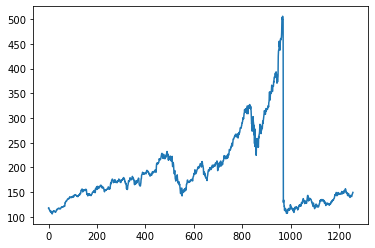

In [43]:
plt.plot(df1)

Beacuse the LSTM is so sensitive to the scale so we applu MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
print(df1) #here is the values of df1 in a form of array

[[0.02982167]
 [0.03132025]
 [0.02467656]
 ...
 [0.1020031 ]
 [0.10752285]
 [0.10877167]]


Now we need to train and test our data 

In [46]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
training_size,test_size 

(817, 440)

In [48]:
print(train_data), print(test_data)

[[0.02982167]
 [0.03132025]
 [0.02467656]
 [0.02190419]
 [0.02000599]
 [0.01955642]
 [0.01443629]
 [0.01468605]
 [0.01029022]
 [0.00781757]
 [0.01173885]
 [0.01336231]
 [0.01291273]
 [0.00519506]
 [0.00679355]
 [0.        ]
 [0.00349668]
 [0.01068984]
 [0.01058994]
 [0.01086468]
 [0.01503572]
 [0.01521055]
 [0.0137869 ]
 [0.01518557]
 [0.0146361 ]
 [0.01436136]
 [0.01201359]
 [0.00944103]
 [0.01046506]
 [0.00849193]
 [0.01058994]
 [0.01328738]
 [0.01600979]
 [0.02058045]
 [0.01895699]
 [0.02367751]
 [0.02367751]
 [0.02525101]
 [0.02562566]
 [0.02729907]
 [0.02807333]
 [0.02834807]
 [0.0264249 ]
 [0.02699935]
 [0.02884759]
 [0.02759878]
 [0.02752385]
 [0.02525101]
 [0.02607523]
 [0.02575054]
 [0.02722414]
 [0.03047105]
 [0.03316849]
 [0.03346821]
 [0.03506669]
 [0.03381787]
 [0.03329337]
 [0.03569109]
 [0.03566612]
 [0.03514162]
 [0.03569109]
 [0.0358909 ]
 [0.03561616]
 [0.04038663]
 [0.04053649]
 [0.04056147]
 [0.03976223]
 [0.03906289]
 [0.05754533]
 [0.05699585]
 [0.05836955]
 [0.06

(None, None)

In [51]:
import numpy
#converting arrays into data matrices
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [52]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [54]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 15s 853ms/step - loss: 0.0143 - val_loss: 0.0320
Epoch 2/100
12/12 [==============================] - 9s 719ms/step - loss: 0.0041 - val_loss: 0.0282
Epoch 3/100
12/12 [==============================] - 8s 725ms/step - loss: 0.0022 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 8s 700ms/step - loss: 0.0011 - val_loss: 0.0219
Epoch 5/100
12/12 [==============================] - 9s 728ms/step - loss: 6.1513e-04 - val_loss: 0.0283
Epoch 6/100
12/12 [==============================] - 8s 676ms/step - loss: 5.3993e-04 - val_loss: 0.0273
Epoch 7/100
12/12 [==============================] - 8s 648ms/step - loss: 5.0745e-04 - val_loss: 0.0259
Epoch 8/100
12/12 [==============================] - 7s 636ms/step - loss: 4.8221e-04 - val_loss: 0.0261
Epoch 9/100
12/12 [==============================] - 8s 672ms/step - loss: 4.5950e-04 - val_loss: 0.0261
Epoch 10/100
12/12 [==============================] - 7s 629ms/step - 

In [60]:
tf.__version__

'2.6.0'

In [61]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [62]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [63]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

191.62005393950076

In [64]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

207.165586605303

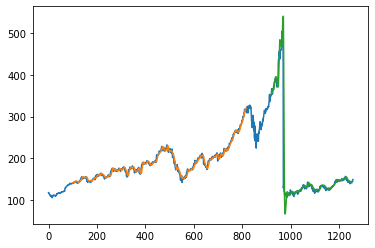

In [66]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

440

In [78]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
temp_input

[0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.10100404615615166,
 0.09913082571557025,
 0.1026275038713223,
 0.1070233278385534,
 0.1080973075578201,
 0.10255257505369902,
 0.0980818222688446,
 0.09973025625655624,
 0.10027973425246023,
 0.0994305409860633,
 0.10402617513362311,
 0.10300214795943852,

In [81]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10177448]
101
1 day input [0.04832909 0.04453269 0.05040212 0.05042709 0.0525251  0.05349918
 0.0509516  0.05404865 0.06186623 0.05976822 0.06104201 0.06513812
 0.06181627 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499
 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.

In [95]:
day_new=np.arange(1,99)
day_pred=np.arange(101,131)

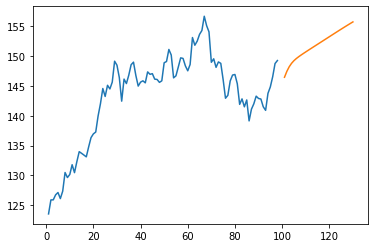

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

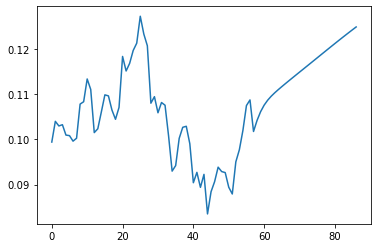

In [100]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [101]:
df3=scaler.inverse_transform(df3).tolist()

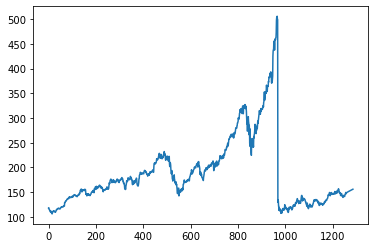

In [102]:
plt.plot(df3)